# INTRODUCTION TO DATA SCIENCE

# CS210 INDIVIDUAL TERM PROJECT

ABDURRAHMAN AYHAN 17891  abdurrahmanayhan@sabanciuniv.edu

# Data Exploration


##### Give basic information regarding the dataset such as shape, data types and descriptive statistics that summarize columns.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Upload the data into code
input_file = "taxi-trips.csv"


# reading data from the csv file
df = pd.read_csv(input_file, header = 0)
# print(df)


In [38]:
#the head of the columns and the example 4 rows to see d,what data include
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [39]:
#row and column number to show shape of data
row,column = df.shape
print(df.shape)


(118185, 11)


In [40]:
#data types of each column in the data
print(df.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [41]:
#control the data have null input or everything is clear to test
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [42]:
#some descriptive statistics about the data 
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


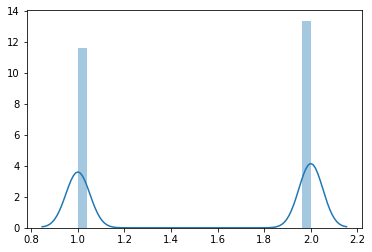

In [67]:
#graph of distribution of each column data
sns.distplot(df["vendor_id"].values, norm_hist=True)  
plt.show()

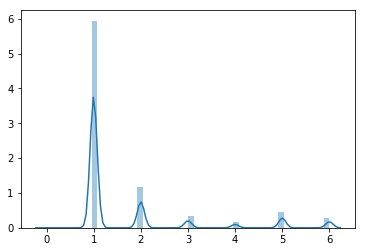

In [44]:
sns.distplot(df["passenger_count"].values, norm_hist=True)  
plt.show()

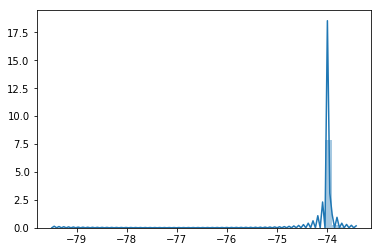

In [45]:
sns.distplot(df["pickup_longitude"].values, norm_hist=True) 
plt.show()

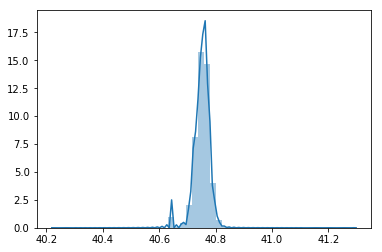

In [46]:
sns.distplot(df["pickup_latitude"].values, norm_hist=True)  
plt.show()

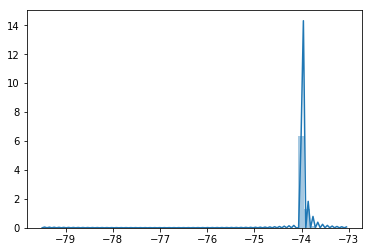

In [47]:
sns.distplot(df["dropoff_longitude"].values, norm_hist=True)
plt.show()

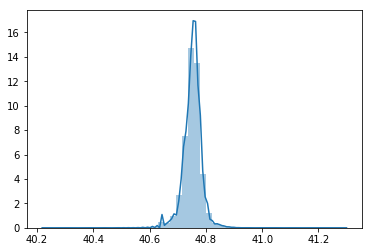

In [48]:
sns.distplot(df["dropoff_latitude"].values, norm_hist=True)  
plt.show()

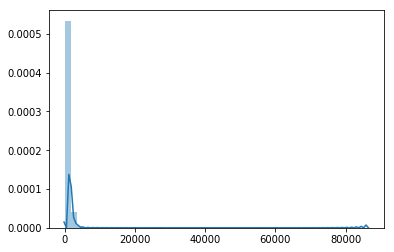

In [49]:
sns.distplot(df["trip_duration"].values, norm_hist=True)  
plt.show()

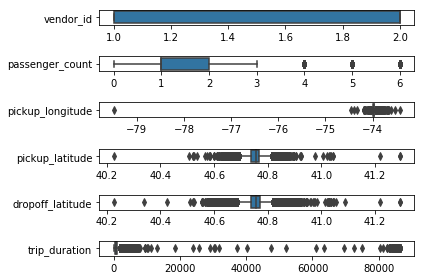

In [50]:

#boxplot figure of distribution of numerical values
plt.subplot(6,1,1)
sns.boxplot(data=df[["vendor_id"]], orient="h")

plt.subplot(6,1,2)
sns.boxplot(data=df[["passenger_count"]], orient="h")

plt.subplot(6,1,3)
sns.boxplot(data=df[["pickup_longitude"]], orient="h")

plt.subplot(6,1,4)
sns.boxplot(data=df[["pickup_latitude"]], orient="h")

plt.subplot(6,1,5)
sns.boxplot(data=df[["dropoff_latitude"]], orient="h")

plt.subplot(6,1,6)
sns.boxplot(data=df[["trip_duration"]], orient="h")


plt.tight_layout()  # auto. positioning of subplots
plt.show()



##### Create two new columns named ”pickup district” and ”dropoﬀ district” by applying reverse geocoding 1 2 to associated coordinates.

In [51]:
import sys
!{sys.executable} -m pip install reverse_geocoder

In [52]:
#print(df['pickup_latitude'].values[3])

In [53]:
import reverse_geocoder as rg
lat = df["pickup_latitude"]
long = df["pickup_longitude"]
pickup_dist_data = list(zip(lat,long))
results = rg.search(pickup_dist_data) # default mode = 2
a_list=[]
for x in range(len(results)):
    a_list.append(results[x]['name'])
    
df.insert(5,"pickup_district",a_list)

lat2 = df["dropoff_latitude"]
long2 = df["dropoff_longitude"]
dropoff_dist_data = list(zip(lat2,long2))
results2 = rg.search(dropoff_dist_data) # default mode = 2
a_list=[]
for x in range(len(results2)):
    a_list.append(results2[x]['name'])
    
df.insert(6,"dropoff_district",a_list)

In [54]:
#the head of the columns and the example 4 rows to see d,what data include after added pickup_district and dropoff_district 
#print(df.head())

##### Extract the top 5 districts where passengers prefer to leave and arrive

In [55]:
print(df['pickup_district'].value_counts().head(5))


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [56]:
print(df['dropoff_district'].value_counts().head(5))


Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


 ##### Create a new column named ”distance” by utilizing pick up and drop oﬀ coordinates 

In [57]:
import sys
!{sys.executable} -m pip install geopy

In [58]:
from geopy.distance import geodesic
lat = df["pickup_latitude"]
long = df["pickup_longitude"]
lat_drop = df["dropoff_latitude"]
long_drop = df["dropoff_longitude"]
pickup_dist_data = list(zip(lat,long))
dropoff_dist_data = list(zip(lat_drop,long_drop))
distList=[]
for var in range(len(pickup_dist_data)):
    dist = geodesic(pickup_dist_data[var], dropoff_dist_data[var]).miles
    distList.append(dist)
df.insert(2,"distance",distList)

In [59]:
#print(df.head())

 ##### Create a new column named ”time of day” by aggregating timestamps in ”pickup datetime” into 5 diﬀerent categories.
##### – 7-9 AM: ”rush hour morning” 
##### – 9 AM - 4 PM : ”afternoon” 
##### – 4-6 PM : ”rush hour evening” 
##### – 6-11 PM : ”evening” – 11 PM 
##### - 7 AM : ”late night”


In [60]:
datetime = df["pickup_datetime"]
timeList=[]
for var in range(len(datetime)):
    if datetime.values[var][11:13]>='07'and datetime.values[var][11:13]<'09':
        #print(datetime.values[var][11:13])
        #print(1,datetime.values[var])
        timeOfDay="rush_hour_morning"
        timeList.append(timeOfDay)
    elif datetime.values[var][11:13]>='09'and datetime.values[var][11:13]<'16':
        #print(datetime.values[var][11:13])
        #print(2,datetime.values[var])
        timeOfDay="afternoon"
        timeList.append(timeOfDay)
    elif datetime.values[var][11:13]>='16'and datetime.values[var][11:13]<'18':
        #print(datetime.values[var][11:13])
        #print(3,datetime.values[var])
        timeOfDay="rush_hour_evening"
        timeList.append(timeOfDay)
    elif datetime.values[var][11:13]>='18' and datetime.values[var][11:13]<'23':
        #print(datetime.values[var][11:13])
        #print(4,datetime.values[var])
        timeOfDay="evening"
        timeList.append(timeOfDay)      
    elif datetime.values[var][11:13]>='23'or datetime.values[var][11:13]<'07':
        #print(datetime.values[var][11:13])
        #print(5,datetime.values[var])
        timeOfDay="late_night"
        timeList.append(timeOfDay)
df.insert(2,"time_of_day",timeList)

In [61]:
#print(df.head())

##### Show how the average distance varies as time of the day changes

time_of_day
late_night           2.558580
evening              2.099076
rush_hour_evening    2.077128
rush_hour_morning    1.943823
afternoon            1.932456
Name: distance, dtype: float64


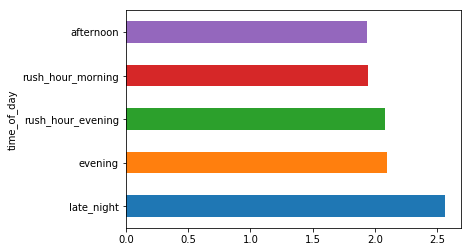

In [62]:
distanceOverTime = df.groupby(by="time_of_day").mean()["distance"].sort_values(ascending=False)[:5]
print(distanceOverTime)
distanceOverTime.plot(kind="barh")  # does not match with the official list
                               # since we removed some of the veterans

##### Show how the trip duration varies as time of the day changes

time_of_day
rush_hour_evening    1024.494552
afternoon             963.922746
rush_hour_morning     918.488716
evening               893.595329
late_night            866.095457
Name: trip_duration, dtype: float64


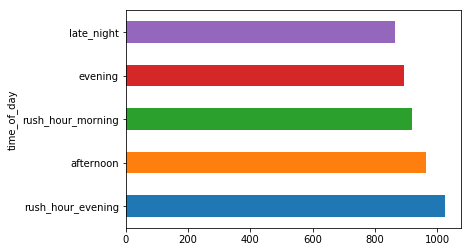

In [63]:
durationOverTime = df.groupby(by="time_of_day").mean()["trip_duration"].sort_values(ascending=False)[:5]
print(durationOverTime)
durationOverTime.plot(kind="barh")  # does not match with the official list
                               # since we removed some of the veterans

In [64]:
df.head()

,id,vendor_id,time_of_day,distance,pickup_datetime,dropoff_datetime,passenger_count,pickup_district,dropoff_district,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,rush_hour_evening,0.933406,2016-03-14 17:24:55,2016-03-14 17:32:30,1,Manhattan,Manhattan,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,evening,3.178194,2016-03-10 21:45:01,2016-03-10 22:05:26,1,Long Island City,Manhattan,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,rush_hour_morning,0.928961,2016-03-11 07:11:23,2016-03-11 07:20:09,1,Weehawken,Manhattan,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,afternoon,1.228003,2016-03-14 14:05:39,2016-03-14 14:28:05,1,Manhattan,Long Island City,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,afternoon,1.562103,2016-03-14 15:04:38,2016-03-14 15:16:13,1,New York City,New York City,-73.994484,40.745087,-73.998993,40.722710,N,695


# HYPOTHESIS TESTING


1. Does passenger group size aﬀect the distance?
    • Null hypothesis: passenger group size has no eﬀect on the distance. 
    • Apply a suitable statistical test and show the results.
    
    According to null hypothesis the result of p test equal to 9.5e-09 mean that the score is lower than %5 and we can say that group size affect the distance
    
2. Do trip distances increase in weekends?
    • Null hypothesis: The day of the week has no eﬀect on the distance.
    • Again, apply a suitable statistical test and show the results. 
    
    According to null hypothesis the result of p test equal to 2.01e-08 mean that the score is lower than %5 and we can say that day of week affect the distance
    
RESULTS ARE SHOWN BELOW:

In [65]:
from scipy import stats
s_df = df[(df["passenger_count"] == 1)]
m_df = df[df["passenger_count"] != 1]
single = s_df["distance"].values
multi = m_df["distance"].values
_, p_value = stats.ttest_ind(a=single, b=multi, equal_var=False)
p_value

9.55513348155769e-07

In [66]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
s_df = df[(df["pickup_datetime"].dt.dayofweek == 5) | (df["pickup_datetime"].dt.dayofweek == 6 )]
m_df = df[(df["pickup_datetime"].dt.dayofweek != 5) & (df["pickup_datetime"].dt.dayofweek != 6 )]
single = s_df["distance"].values
multi = m_df["distance"].values
_, p_value = stats.ttest_ind(a=single, b=multi, equal_var=False)
p_value

2.0924144330692153e-08